In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
path=pathlib.Path('/media/tris/tris_files/era-for-bw')
path

PosixPath('/media/tris/tris_files/era-for-bw')

In [4]:
df = pd.read_csv(path/'labels_proc.csv')
df.tail()

,file_name,subject_label
1275,s32_t36,32
1276,s32_t37,32
1277,s32_t38,32
1278,s32_t39,32
1279,s32_t40,32


In [5]:
os.path.isfile(path/'labels_proc.csv')

True

In [6]:
# np.random.seed(60)
# src = (ImageList.from_csv(path, 'labels_proc.csv', folder='GAF-cmap', suffix='.png')
#        .split_by_rand_pct(0.2)
#        .label_from_df(cols=['valence','arousal','dominance','liking'],label_cls=FloatList)
#        .transform()
#        .databunch(bs=10).normalize(imagenet_stats))

In [7]:
#np.random.seed(60)
src = (ImageList.from_csv(path, 'labels_proc.csv', folder='GAF-cmap-BW', suffix='.png')
       .split_by_rand_pct(0.2)
       .label_from_df(cols=['subject_label'])
       .transform()
       .databunch(bs=4).normalize())



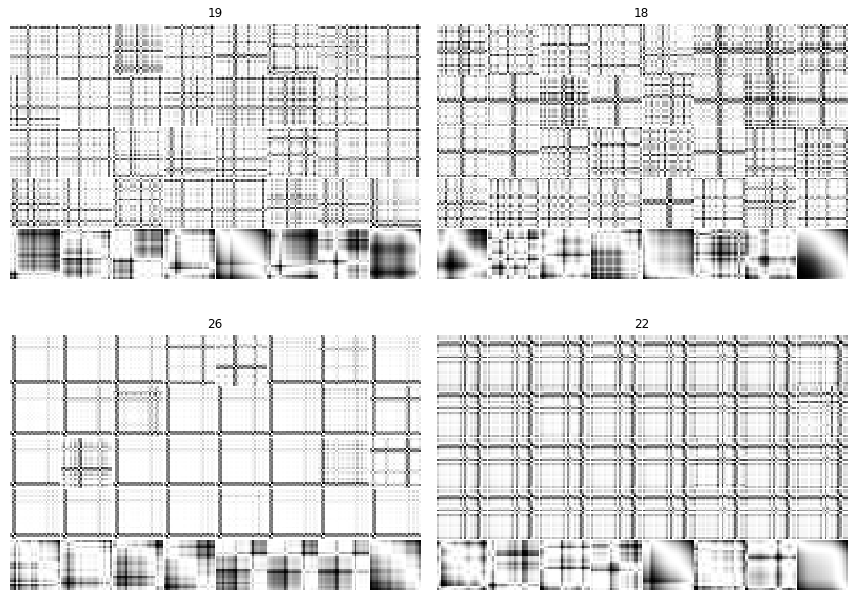

In [8]:
src.show_batch(rows=2, figsize=(12,9))

In [9]:
learn = cnn_learner(src, models.resnet34, metrics=[accuracy])
#learn = unet_learner(src, models.resnet18, metrics=[root_mean_squared_error])

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


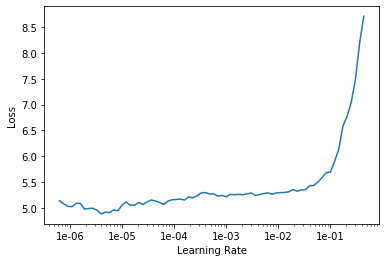

In [10]:
learn.lr_find()
learn.recorder.plot()

In [11]:
lr = 3e-3

In [12]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,4.909984,4.153630,0.031250,01:07
1,4.399131,4.055764,0.062500,01:07
2,4.010245,3.546216,0.074219,01:07
3,3.269658,3.350843,0.082031,01:07
4,2.774336,3.292112,0.078125,01:07


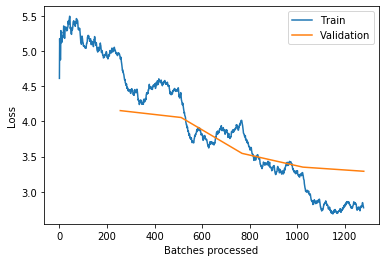

In [13]:
learn.recorder.plot_losses()

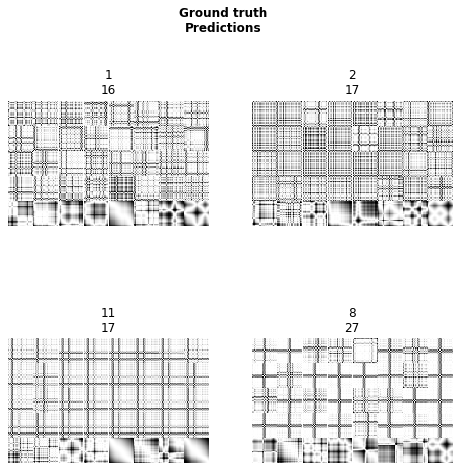

In [14]:
learn.show_results()

# 2020-09-11 
Shutting this repo down, OMA and DMD approaches showing much better results. Good learning here tho.